In [677]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [678]:
Sparkling = pd.read_csv("Sparkling.csv",header = 0, index_col = 0, parse_dates = True,squeeze=False) # squeeze as true read data as series

In [679]:
print(Sparkling.head())
print(Sparkling.tail())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
            Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031


In [680]:
Sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [681]:
Sparkling.isna().sum()

Sparkling    0
dtype: int64

<Figure size 1080x360 with 0 Axes>

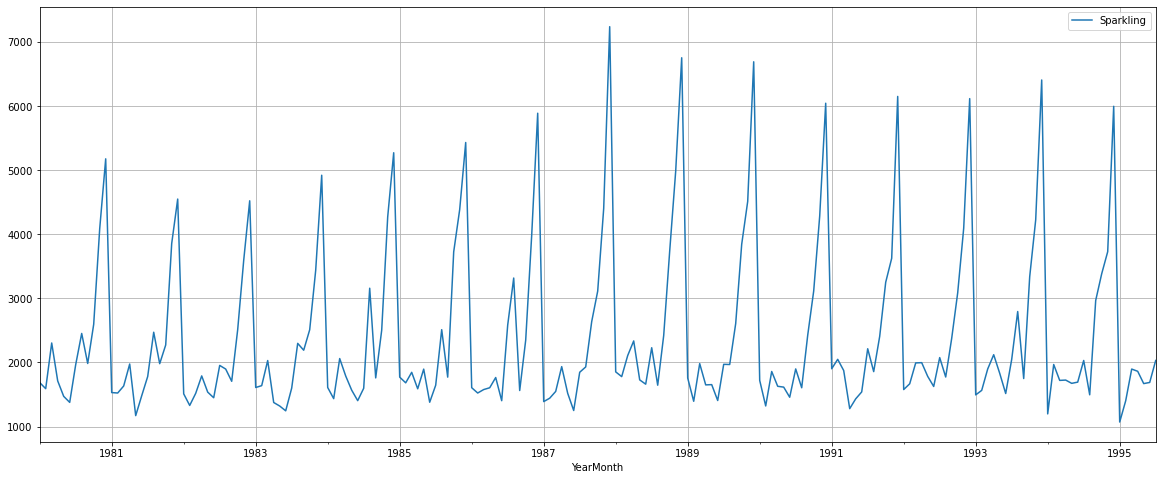

In [682]:
plt.figure(figsize=(15,5));
Sparkling.plot(figsize=(20,8));
plt.grid();

In [683]:
type(Sparkling)

pandas.core.frame.DataFrame

### Yearly Boxplot

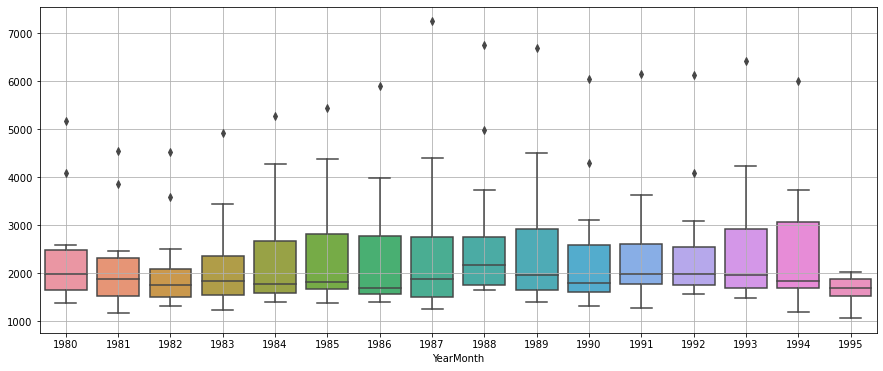

In [684]:
plt.figure(figsize=(15,6))
sns.boxplot(x = Sparkling.index.year,y = Sparkling.values[:,0])
plt.grid();

### Monthly Boxplot

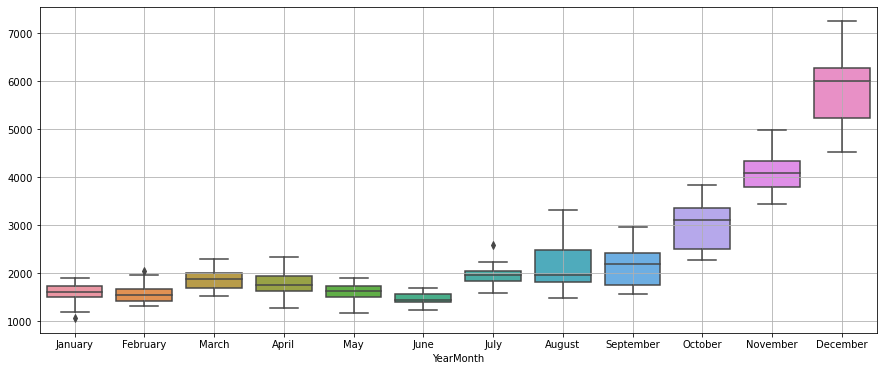

In [685]:
plt.figure(figsize=(15,6))
sns.boxplot(x = Sparkling.index.month_name(),y = Sparkling.values[:,0])
plt.grid();

## Decompose the Time Series

In [686]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

In [687]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

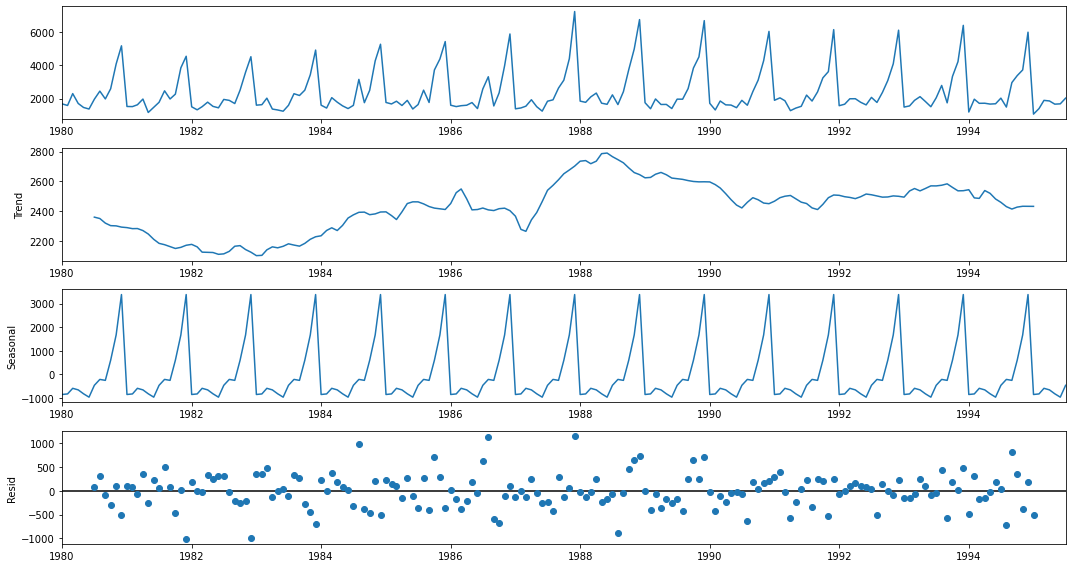

In [688]:
decomposition = seasonal_decompose(Sparkling,model='additive')
decomposition.plot();

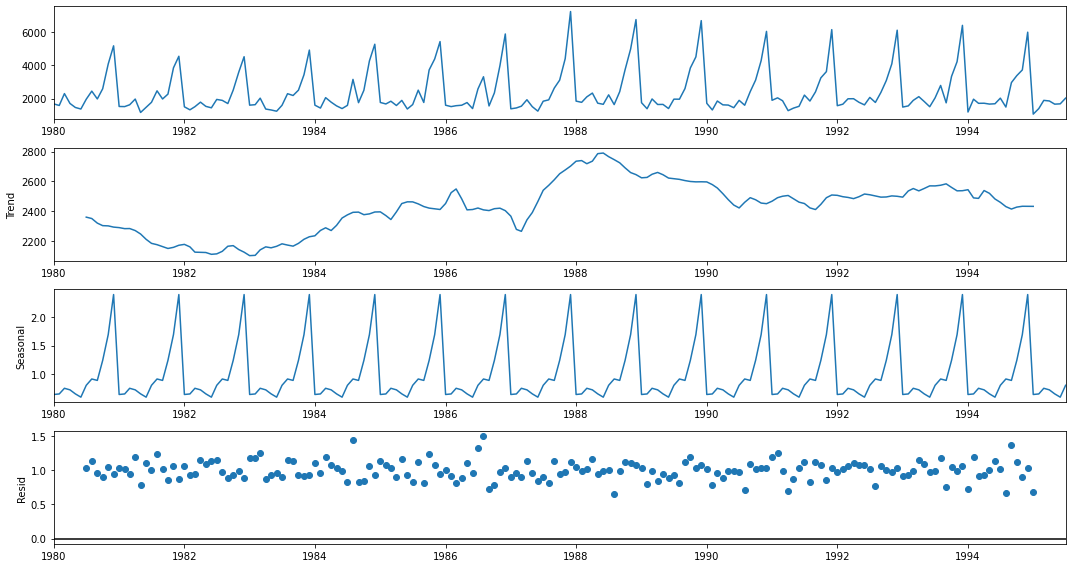

In [689]:
decomposition = seasonal_decompose(Sparkling,model='multiplicative')
decomposition.plot();

In [690]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

## Split the data into train and test and plot the training and test data.

In [691]:
Sparkling.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [692]:
Sparkling.shape

(187, 1)

In [693]:
train = Sparkling[Sparkling.index<'1991']
test = Sparkling[Sparkling.index>='1991']

In [694]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [695]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 


First few rows of Test Data 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



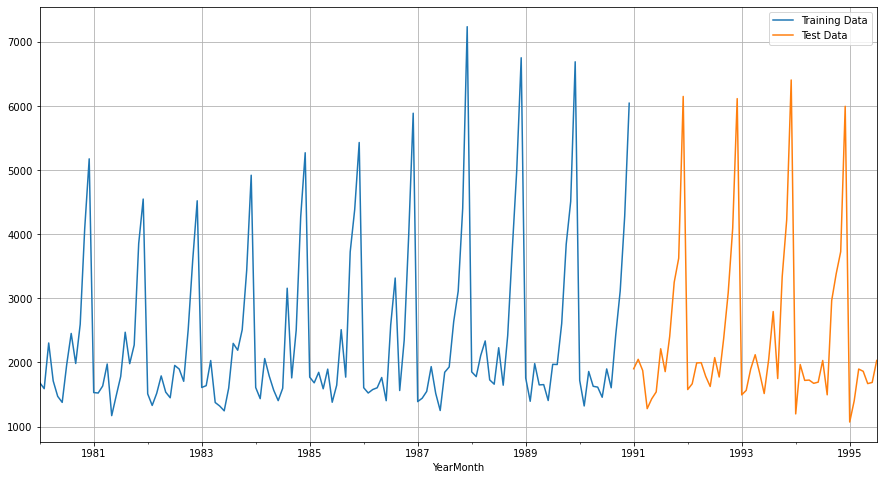

In [696]:
train['Sparkling'].plot()
test['Sparkling'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics.

In [697]:
train.head(10)

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
1980-06-01,1377
1980-07-01,1966
1980-08-01,2453
1980-09-01,1984


## Model 1: Linear Regression

In [698]:
list(range(len(train)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131]

In [699]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time,'\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [700]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [701]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 


First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [702]:
LinearRegression_train.head()

,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


In [703]:
from sklearn.linear_model import LinearRegression

In [704]:
lr = LinearRegression()

In [705]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

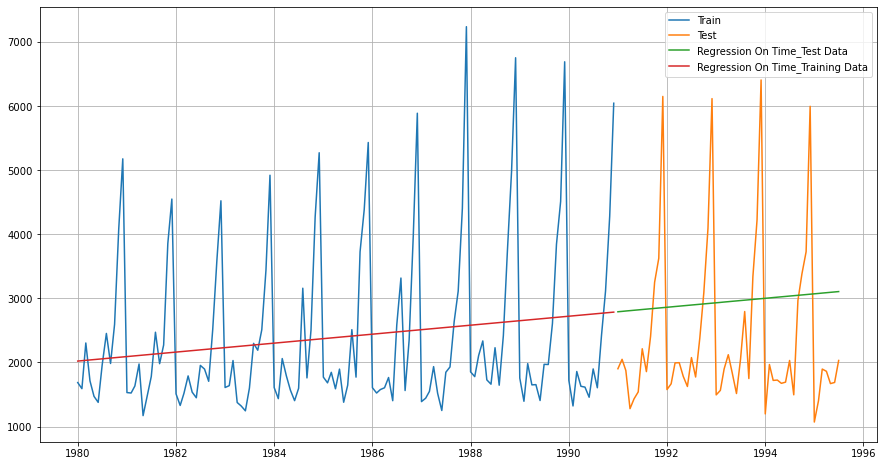

In [706]:
# Generating the predictions on the training data
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
# Adding the predictions on the training set to the afore-defined Linear Regression Training data
LinearRegression_train['RegOnTime'] = train_predictions_model1

# Generating the predictions on the test data
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
# Adding the predictions on the test set to the afore-defined Linear Regression Test data
LinearRegression_test['RegOnTime'] = test_predictions_model1

# Plotting the actual training data
plt.plot( train['Sparkling'], label='Train')
# Plotting the actual test data
plt.plot(test['Sparkling'], label='Test')
# Plotting the predicted training data
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
# Plotting the predicted test data
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
# Setting the location of the legend
plt.legend(loc='best')
plt.grid();

In [707]:
from sklearn import metrics
from   math              import sqrt

In [708]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

### Model Evaluation

In [709]:
## Training Data - RMSE and MAPE

rmse_model1_train = (metrics.mean_squared_error(train['Sparkling'],train_predictions_model1))**0.5
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 MAPE is 40.70


In [710]:
## Test Data - RMSE and MAPE

rmse_model1_test = (metrics.mean_squared_error(test['Sparkling'],test_predictions_model1))**0.5
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 MAPE is 59.35


In [711]:
RMSE=((sum((test['Sparkling']-test_predictions_model1)**2))/len(test_predictions_model1))**(0.5)
print(RMSE)

1389.1351748979919


In [712]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test],'MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,RMSE,MAPE
RegressionOnTime,1389.135175,59.345572


## Model 2: Naive

In [713]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [714]:
NaiveModel_train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [715]:
NaiveModel_test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [716]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

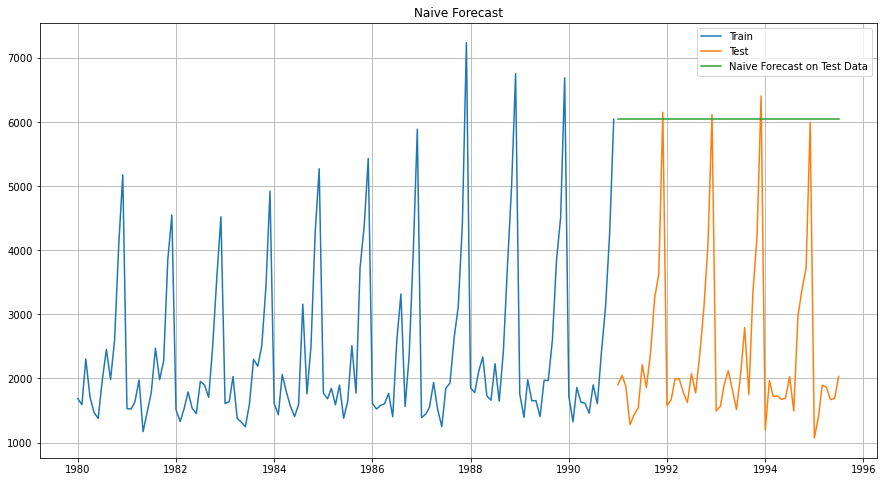

In [717]:
## Plotting the actual training data
plt.plot(NaiveModel_train['Sparkling'], label='Train')
## Plotting the acutal test data
plt.plot(test['Sparkling'], label='Test')
## Plottig the predicted test data
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [718]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'])**0.5
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 MAPE is 201.33


In [719]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test],'MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE,MAPE
RegressionOnTime,1389.135175,59.345572
NaiveModel,3864.279352,201.327650


## Method 3: Simple Average

In [720]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [721]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


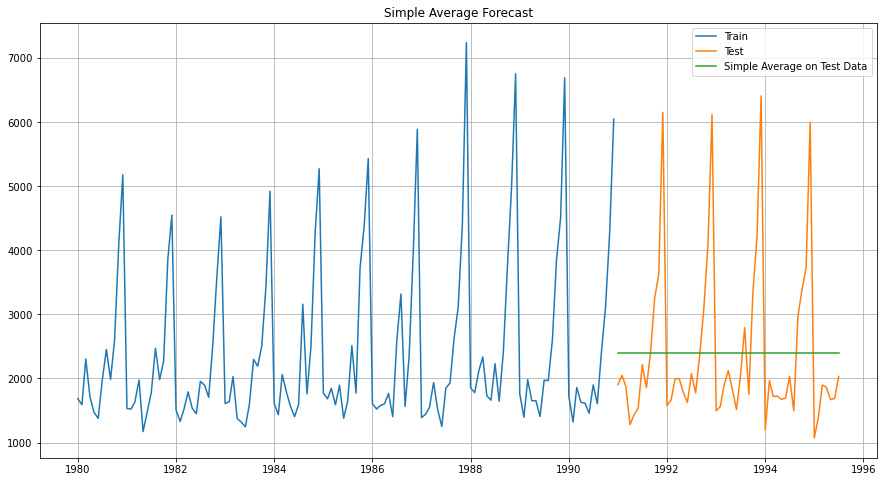

In [722]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [723]:
## Test Data - RMSE and MAPE
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'])**0.5
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 39.16


In [724]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test],'MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE,MAPE
RegressionOnTime,1389.135175,59.345572
NaiveModel,3864.279352,201.327650
SimpleAverageModel,1275.081804,39.157336


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

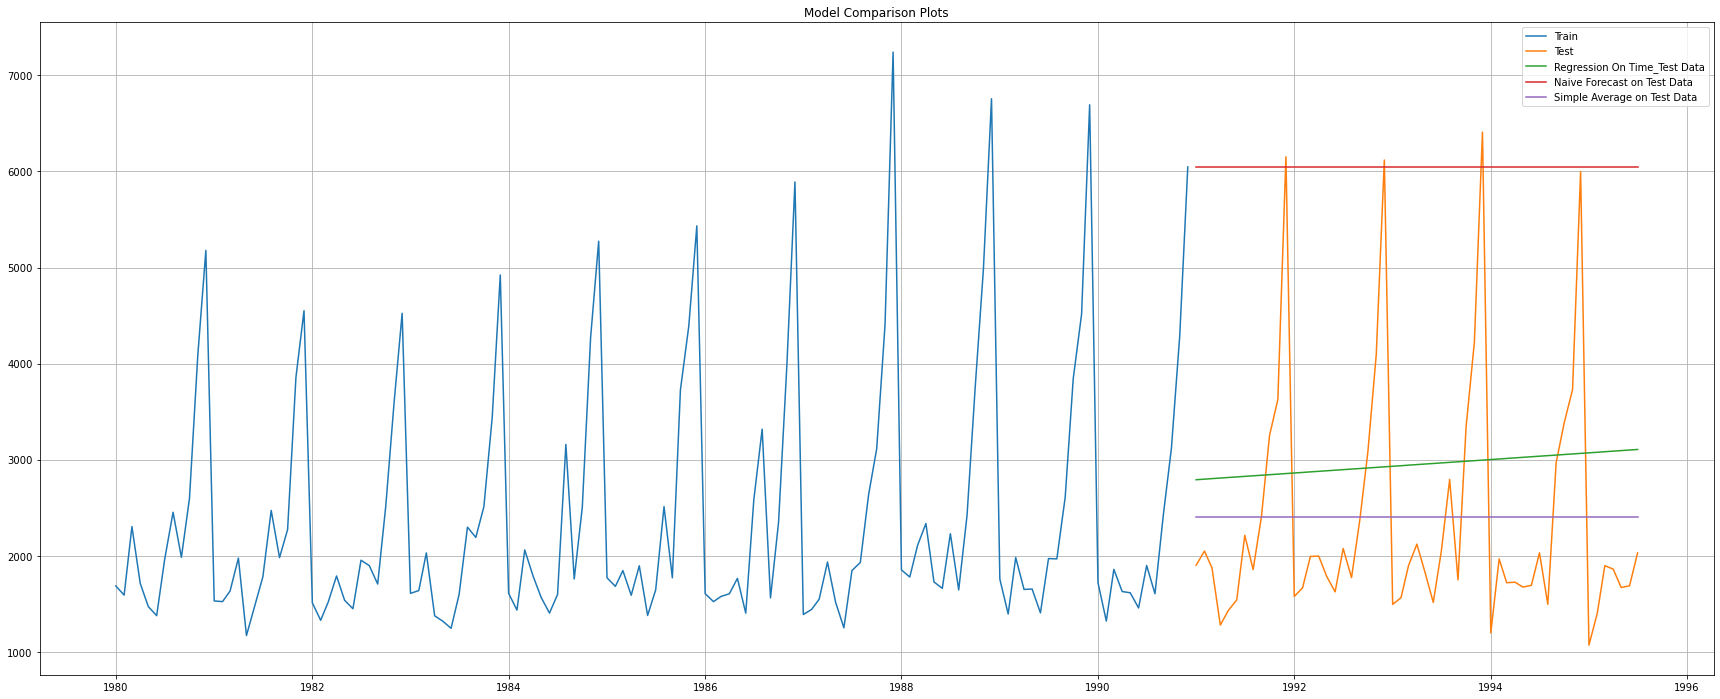

In [725]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 4: Simple Exponential Smoothing

In [726]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [727]:
SES_train = train.copy()
SES_test = test.copy()

In [728]:
SES_train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [729]:
SES_test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [730]:

model_SES = SimpleExpSmoothing(SES_train['Sparkling']);

In [731]:
model_SES_autofit = model_SES.fit(optimized=True);

In [732]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [733]:
SES_train['predict'] = model_SES_autofit.fittedvalues
print(SES_train.head(),'\n')
print(SES_train.tail(),'\n')

            Sparkling      predict
YearMonth                         
1980-01-01       1686  1818.535750
1980-02-01       1591  1811.961001
1980-03-01       2304  1800.999709
1980-04-01       1712  1825.952226
1980-05-01       1471  1820.299357 

            Sparkling      predict
YearMonth                         
1990-08-01       1605  2469.859218
1990-09-01       2424  2426.955835
1990-10-01       3116  2426.809204
1990-11-01       4286  2460.998140
1990-12-01       6047  2551.531665 



In [734]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,2724.932624
1991-02-01,2049,2724.932624
1991-03-01,1874,2724.932624
1991-04-01,1279,2724.932624
1991-05-01,1432,2724.932624


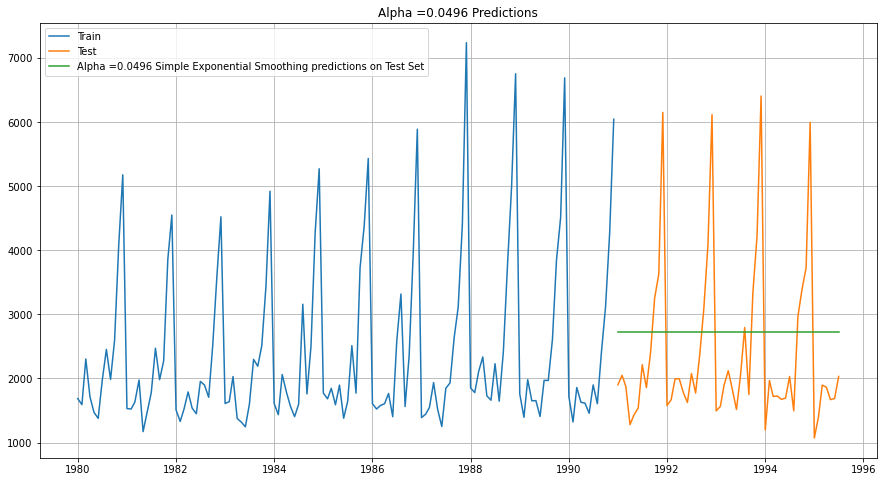

In [735]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

#plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

In [736]:
rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'])**0.5
mape_model5_train_1 = MAPE(SES_train['Sparkling'],SES_train['predict'])
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1315.232 MAPE is 38.64


In [737]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'])**0.5
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1316.035 MAPE is 50.94


In [738]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1],'MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,RMSE,MAPE
RegressionOnTime,1389.135175,59.345572
NaiveModel,3864.279352,201.327650
SimpleAverageModel,1275.081804,39.157336
"Alpha=0.0496,SimpleExponentialSmoothing",1316.035487,50.940345


In [739]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [740]:
# Defining a loop which iterates from 0.1 to 1 at an interval of 0.1.
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])
for i in np.arange(0.1,1,0.1):
    # Fitting the Simple Exponential Smoothing model with different alpha values got from the defined loop above
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False)
    # Storing the predicted values of the training set in the training data frame. 
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    # Storing the predicted values of the test set in the test data frame
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    # Evaluating the predictions on the training set using the RMSE and MAPE
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i])**0.5
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    # Evaluating the predictions on the test set using the RMSE and MAPE
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i])**0.5
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    # Adding all the RMSE and MAPE values for both training and test set for their corresponding alpha values.
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [741]:
from IPython.display import display 

In [742]:
print('Training Data Frame')
display(SES_train.head())
print('Test Data Frame')
display(SES_test.head())

Training Data Frame


,Sparkling,predict,"(predict, 0.1)","(predict, 0.2)","(predict, 0.30000000000000004)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7000000000000001)","(predict, 0.8)","(predict, 0.9)"
YearMonth,,,,,,,,,,,
1980-01-01,1686,1818.535750,1686.000,1686.00,1686.000,1686.00,1686.000,1686.0,1686.000,1686.00,1686.000
1980-02-01,1591,1811.961001,1686.000,1686.00,1686.000,1686.00,1686.000,1686.0,1686.000,1686.00,1686.000
1980-03-01,2304,1800.999709,1676.500,1667.00,1657.500,1648.00,1638.500,1629.0,1619.500,1610.00,1600.500
1980-04-01,1712,1825.952226,1739.250,1794.40,1851.450,1910.40,1971.250,2034.0,2098.650,2165.20,2233.650
1980-05-01,1471,1820.299357,1736.525,1777.92,1809.615,1831.04,1841.625,1840.8,1827.995,1802.64,1764.165


Test Data Frame


,Sparkling,predict,"(predict, 0.1)","(predict, 0.2)","(predict, 0.30000000000000004)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7000000000000001)","(predict, 0.8)","(predict, 0.9)"
YearMonth,,,,,,,,,,,
1991-01-01,1902,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614
1991-02-01,2049,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614
1991-03-01,1874,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614
1991-04-01,1279,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614
1991-05-01,1432,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614


In [743]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,1333.873836,41.891584,1375.393398,58.065993
1,0.2,1356.042987,44.716378,1595.206839,75.835713
2,0.3,1359.511747,45.291824,1935.507132,97.899850
3,0.4,1352.588879,44.829346,2311.919615,119.766111
4,0.5,1344.004369,43.586790,2666.351413,139.360359
5,0.6,1338.805381,42.560355,2979.204388,155.997510
6,0.7,1338.844308,41.570762,3249.944092,170.072674
7,0.8,1344.462091,40.848908,3483.801006,182.056247
8,0.9,1355.723518,40.253329,3686.794285,192.356363


In [744]:
print('Sorting the Values by the RMSE on the test set')
display(resultsDf_6.sort_values(by='Test RMSE').head())
print('Sorting the Values by the MAPE on the test set')
display(resultsDf_6.sort_values(by='Test MAPE').head())

Sorting the Values by the RMSE on the test set


,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,1333.873836,41.891584,1375.393398,58.065993
1,0.2,1356.042987,44.716378,1595.206839,75.835713
2,0.3,1359.511747,45.291824,1935.507132,97.899850
3,0.4,1352.588879,44.829346,2311.919615,119.766111
4,0.5,1344.004369,43.586790,2666.351413,139.360359


Sorting the Values by the MAPE on the test set


,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,1333.873836,41.891584,1375.393398,58.065993
1,0.2,1356.042987,44.716378,1595.206839,75.835713
2,0.3,1359.511747,45.291824,1935.507132,97.899850
3,0.4,1352.588879,44.829346,2311.919615,119.766111
4,0.5,1344.004369,43.586790,2666.351413,139.360359


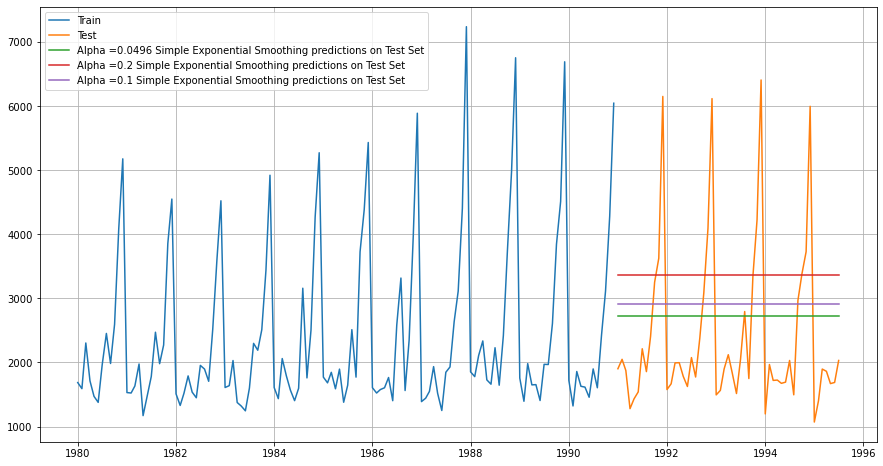

In [745]:
# Plotting the actual training data
plt.plot(SES_train['Sparkling'], label='Train')
# Plotting the actual test data
plt.plot(SES_test['Sparkling'], label='Test')

# Plotting the predicted training data with Alpha=1
#plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
# Plotting the predicted test data with Alpha=1
plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

# Plotting the predicted training data with Alpha=0.2 (best prediction in terms of RMSE and MAPE on the test data)
#plt.plot(SES_train['predict', 0.2], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
# Plotting the predicted training data with Alpha=0.2 (best prediction in terms of RMSE and MAPE on the test data)
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')

# Plotting the predicted training data with Alpha=0.1 (second best prediction in terms of RMSE and MAPE on the test data)
#plt.plot(SES_train['predict', 0.1], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
# Plotting the predicted test data with Alpha=0.1 (second best prediction in terms of RMSE and MAPE on the test data)
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [746]:
resultsDf_6_1 = pd.DataFrame({'RMSE': [resultsDf_6['Test RMSE'][1],resultsDf_6['Test RMSE'][0]]
                            ,'MAPE': [resultsDf_6['Test MAPE'][1],resultsDf_6['Test MAPE'][0]]}
                           ,index=['Alpha=0.2,SimpleExponentialSmoothing','Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,RMSE,MAPE
RegressionOnTime,1389.135175,59.345572
NaiveModel,3864.279352,201.327650
SimpleAverageModel,1275.081804,39.157336
"Alpha=0.0496,SimpleExponentialSmoothing",1316.035487,50.940345
"Alpha=0.2,SimpleExponentialSmoothing",1595.206839,75.835713
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398,58.065993


## Method 5: Double Exponential Smoothing (Holt's Model)

In [747]:
DES_train = train.copy()
DES_test = test.copy()

In [748]:
model_DES = Holt(DES_train['Sparkling'])

In [749]:
model_DES_autofit = model_DES.fit(optimized=True)

In [750]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [751]:
DES_train['predict'] = model_SES_autofit.fittedvalues
print(DES_train.head(),'\n')
print(DES_train.tail(),'\n')

            Sparkling      predict
YearMonth                         
1980-01-01       1686  1818.535750
1980-02-01       1591  1811.961001
1980-03-01       2304  1800.999709
1980-04-01       1712  1825.952226
1980-05-01       1471  1820.299357 

            Sparkling      predict
YearMonth                         
1990-08-01       1605  2469.859218
1990-09-01       2424  2426.955835
1990-10-01       3116  2426.809204
1990-11-01       4286  2460.998140
1990-12-01       6047  2551.531665 



In [752]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(SES_test))
DES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,5221.278699
1991-02-01,2049,5127.886554
1991-03-01,1874,5034.494409
1991-04-01,1279,4941.102264
1991-05-01,1432,4847.710119


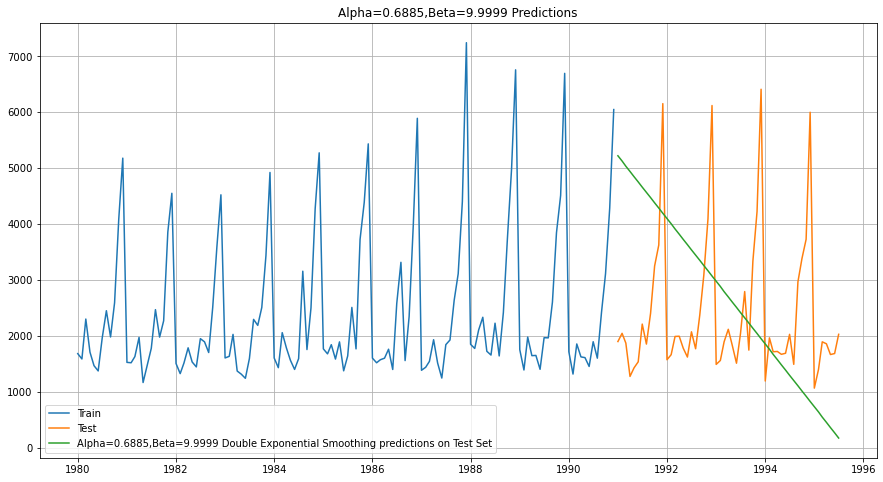

In [753]:
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

#plt.plot(DES_train['predict'], label='Alpha=1,Beta=0 Double Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['predict'], label='Alpha=0.6885,Beta=9.9999 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.6885,Beta=9.9999 Predictions');

In [754]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [755]:
for i in np.arange(0.1,1.1,0.1): #Defining the alpha values from this loop
    for j in np.arange(0.1,1.1,0.1): #Defining the beta values from this loop
# We have defined a nested loop. This means one loop inside another. Here, due to this loop Python is going to fit the
# the Double Exponential model by varying different alpha and beta parameters. The way Python runs these set of loops is
# it fixes the value of 'i' (which is alpha) and varies all the values of 'j' (which is beta).

        # Fitting the Double Exponential Smoothing model with appropriate i and j values from the loop
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
        # Predicting on the training set
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        # Predicting on the training set
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        # Model Evaluation using RMSE and MAPE on for the training data predictions
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j])**0.5
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        # Model Evaluation using RMSE and MAPE on for the test data predictions
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j])**0.5
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        # Putting all the model evaluation results into one data frame with their corresponding alpha and beta values
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [756]:
print('Training Data Frame')
display(DES_train.head())
print('Test Data Frame')
display(DES_test.head())

Training Data Frame


,Sparkling,predict,"(predict, 0.1, 0.1)","(predict, 0.1, 0.2)","(predict, 0.1, 0.30000000000000004)","(predict, 0.1, 0.4)","(predict, 0.1, 0.5)","(predict, 0.1, 0.6)","(predict, 0.1, 0.7000000000000001)","(predict, 0.1, 0.8)",...,"(predict, 1.0, 0.1)","(predict, 1.0, 0.2)","(predict, 1.0, 0.30000000000000004)","(predict, 1.0, 0.4)","(predict, 1.0, 0.5)","(predict, 1.0, 0.6)","(predict, 1.0, 0.7000000000000001)","(predict, 1.0, 0.8)","(predict, 1.0, 0.9)","(predict, 1.0, 1.0)"
YearMonth,,,,,,,,,,,,,,,,,,,,,
1980-01-01,1686,1818.535750,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,...,1591.0000,1591.000,1591.0000,1591.000,1591.0000,1591.000,1591.0000,1591.000,1591.0000,1591.0
1980-02-01,1591,1811.961001,1506.450000,1507.400000,1508.350000,1509.300000,1510.250000,1511.200000,1512.150000,1513.100000,...,1600.5000,1610.000,1619.5000,1629.000,1638.5000,1648.000,1657.5000,1667.000,1676.5000,1686.0
1980-03-01,2304,1800.999709,1421.700500,1424.332000,1426.944500,1429.538000,1432.112500,1434.668000,1437.204500,1439.722000,...,1504.5500,1511.200,1515.9500,1518.800,1519.7500,1518.800,1515.9500,1511.200,1504.5500,1496.0
1980-04-01,1712,1825.952226,1425.548945,1438.464160,1451.291215,1464.030680,1476.683125,1489.249120,1501.729235,1514.124040,...,2297.4950,2382.760,2465.3650,2545.880,2624.8750,2702.920,2780.5850,2858.440,2937.0550,3017.0
1980-05-01,1471,1820.299357,1372.677056,1397.453821,1421.824522,1445.792865,1469.362531,1492.537181,1515.320450,1537.715953,...,1646.9455,1656.608,1647.3555,1620.328,1576.4375,1516.368,1440.5755,1349.288,1242.5055,1120.0


Test Data Frame


,Sparkling,predict,"(predict, 0.1, 0.1)","(predict, 0.1, 0.2)","(predict, 0.1, 0.30000000000000004)","(predict, 0.1, 0.4)","(predict, 0.1, 0.5)","(predict, 0.1, 0.6)","(predict, 0.1, 0.7000000000000001)","(predict, 0.1, 0.8)",...,"(predict, 1.0, 0.1)","(predict, 1.0, 0.2)","(predict, 1.0, 0.30000000000000004)","(predict, 1.0, 0.4)","(predict, 1.0, 0.5)","(predict, 1.0, 0.6)","(predict, 1.0, 0.7000000000000001)","(predict, 1.0, 0.8)","(predict, 1.0, 0.9)","(predict, 1.0, 1.0)"
YearMonth,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1902,5221.278699,2849.235097,2733.260852,2733.634054,2790.510417,2813.443664,2762.901540,2672.402147,2581.102542,...,6395.022646,6719.319012,6986.301520,7193.228079,7353.141982,7479.950925,7583.467265,7670.113850,7744.142473,7808.0
1991-02-01,2049,5127.886554,2876.192175,2796.735724,2855.782925,2968.705961,3034.964256,3023.334119,2981.905258,2961.481694,...,6743.045292,7391.638024,7925.603039,8339.456158,8659.283963,8912.901849,9119.934529,9293.227700,9441.284946,9569.0
1991-03-01,1874,5034.494409,2903.149252,2860.210596,2977.931796,3146.901505,3256.484847,3283.766698,3291.408368,3341.860847,...,7091.067937,8063.957036,8864.904559,9485.684237,9965.425945,10345.852774,10656.401794,10916.341550,11138.427419,11330.0
1991-04-01,1279,4941.102264,2930.106330,2923.685468,3100.080667,3325.097048,3478.005439,3544.199277,3600.911478,3722.240000,...,7439.090583,8736.276049,9804.206078,10631.912316,11271.567926,11778.803699,12192.869059,12539.455401,12835.569892,13091.0
1991-05-01,1432,4847.710119,2957.063408,2987.160340,3222.229538,3503.292592,3699.526031,3804.631856,3910.414589,4102.619152,...,7787.113229,9408.595061,10743.507598,11778.140395,12577.709908,13211.754624,13729.336323,14162.569251,14532.712365,14852.0


In [757]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,1382.520870,44.731643,1778.564670,85.874037
1,0.1,0.2,1413.598835,47.112192,2599.439986,125.772168
2,0.1,0.3,1445.762015,48.496713,4293.084674,202.571279
3,0.1,0.4,1480.897776,50.039723,6039.537339,280.335660
4,0.1,0.5,1521.108657,51.793464,7390.522201,339.678862
...,...,...,...,...,...,...
95,1.0,0.6,1753.402326,58.551510,49327.087977,2207.095733
96,1.0,0.7,1825.187155,62.185508,52655.765663,2352.014864
97,1.0,0.8,1902.013709,65.584391,55442.273880,2473.316948
98,1.0,0.9,1985.368445,68.640536,57823.177011,2576.954342


In [758]:
print('Sorting the Values by the RMSE on the test set')
display(resultsDf_7.sort_values(by='Test RMSE').head())
print('Sorting the Values by the MAPE on the test set')
display(resultsDf_7.sort_values(by='Test MAPE').head())

Sorting the Values by the RMSE on the test set


,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,1382.520870,44.731643,1778.564670,85.874037
1,0.1,0.2,1413.598835,47.112192,2599.439986,125.772168
10,0.2,0.1,1418.041591,47.982654,3611.763322,177.929258
2,0.1,0.3,1445.762015,48.496713,4293.084674,202.571279
20,0.3,0.1,1431.169601,49.123296,5908.185554,286.406404


Sorting the Values by the MAPE on the test set


,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,1382.520870,44.731643,1778.564670,85.874037
1,0.1,0.2,1413.598835,47.112192,2599.439986,125.772168
10,0.2,0.1,1418.041591,47.982654,3611.763322,177.929258
2,0.1,0.3,1445.762015,48.496713,4293.084674,202.571279
3,0.1,0.4,1480.897776,50.039723,6039.537339,280.335660


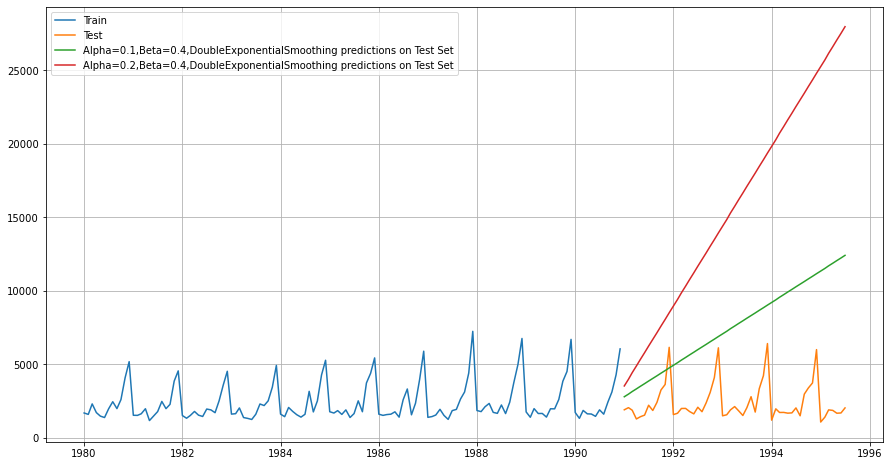

In [759]:
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

#plt.plot(DES_train['predict', 0.1, 0.4], label='Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.4], label='Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')

#plt.plot(DES_train['predict', 0.2, 0.4], label='Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.2, 0.4], label='Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [760]:
resultsDf_7_1 = pd.DataFrame({'RMSE': [resultsDf_7['Test RMSE'][3],resultsDf_7['Test RMSE'][10]],
                              'MAPE':[resultsDf_7['Test MAPE'][3],resultsDf_7['Test MAPE'][10]]}
                           ,index=['Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing','Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,RMSE,MAPE
RegressionOnTime,1389.135175,59.345572
NaiveModel,3864.279352,201.327650
SimpleAverageModel,1275.081804,39.157336
"Alpha=0.0496,SimpleExponentialSmoothing",1316.035487,50.940345
"Alpha=0.2,SimpleExponentialSmoothing",1595.206839,75.835713
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398,58.065993
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",6039.537339,280.335660
"Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing",3611.763322,177.929258


## Method 6: Triple Exponential Smoothing (Holt - Winter's Model)

In [761]:
TES_train = train.copy()
TES_test = test.copy()

In [762]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [763]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],seasonal='mul',seasonal_periods=12)

In [764]:
model_TES_autofit = model_TES.fit(optimized=True)

In [765]:
model_TES_autofit.params

{'smoothing_level': 0.14644143604202703,
 'smoothing_trend': nan,
 'smoothing_seasonal': 0.43771606152878006,
 'damping_trend': nan,
 'initial_level': 1639.9874185548679,
 'initial_trend': nan,
 'initial_seasons': array([1.06423519, 1.02368916, 1.40537547, 1.20804931, 0.97980329,
        0.99858781, 1.29302522, 1.63359607, 1.34507041, 1.71113825,
        2.65270714, 3.32772727]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [766]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Sparkling,auto_predict
YearMonth,,
1980-01-01,1686,1745.332329
1980-02-01,1591,1670.479663
1980-03-01,2304,2277.345413
1980-04-01,1712,1960.942853
1980-05-01,1471,1560.879147


In [767]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

,Sparkling,auto_predict
YearMonth,,
1991-01-01,1902,1579.795766
1991-02-01,2049,1324.664982
1991-03-01,1874,1767.857964
1991-04-01,1279,1643.354800
1991-05-01,1432,1555.177240


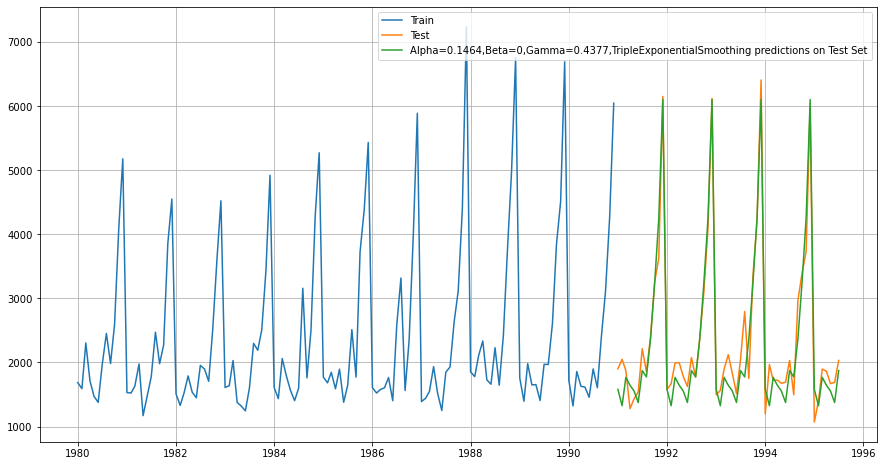

In [768]:
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#plt.plot(TES_train['auto_predict'], label='Alpha=0.789,Beta=0.105,Gamma=0.210,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [769]:
rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'])**0.5
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print('For Alpha=0.1464,Beta=0,Gamma=0.4377, Triple Exponential Smoothing Model forecast on the Training Data'  '\nRMSE is %3.3f MAPE is %3.2f' %(rmse_model6_train_1, mape_model6_train_1))

For Alpha=0.1464,Beta=0,Gamma=0.4377, Triple Exponential Smoothing Model forecast on the Training Data
RMSE is 356.086 MAPE is 11.07


In [770]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'])**0.5
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print('For Alpha=0.1464,Beta=0,Gamma=0.4377, Triple Exponential Smoothing Model forecast on the Training Data'  '\nRMSE is %3.3f MAPE is %3.2f' %(rmse_model6_test_1, mape_model6_test_1))

For Alpha=0.1464,Beta=0,Gamma=0.4377, Triple Exponential Smoothing Model forecast on the Training Data
RMSE is 322.210 MAPE is 12.29


In [771]:
resultsDf_8_1 = pd.DataFrame({'RMSE': [rmse_model6_test_1],'MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,RMSE,MAPE
RegressionOnTime,1389.135175,59.345572
NaiveModel,3864.279352,201.327650
SimpleAverageModel,1275.081804,39.157336
"Alpha=0.0496,SimpleExponentialSmoothing",1316.035487,50.940345
"Alpha=0.2,SimpleExponentialSmoothing",1595.206839,75.835713
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398,58.065993
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",6039.537339,280.335660
"Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing",3611.763322,177.929258
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",322.209983,12.292042


In [772]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [773]:
for i in np.arange(0.1,1.1,0.1): #Defining the alpha values from the loop
    for j in np.arange(0.1,1.1,0.1): #Defining the beta values from the loop
        for k in np.arange(0.1,1.1,0.1): #Defining the gamma values from the loop
# We have defined a nested loop. This means one loop inside another. Here, due to this loop Python is going to fit 
# the Triple Exponential model by varying different alpha and beta parameters. 


            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k])**0.5
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k])**0.5
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [774]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,0.1,388.433050,11.460799,344.526046,13.238185
1,0.1,0.1,0.2,371.259035,11.133697,307.430934,11.920625
2,0.1,0.1,0.3,362.151574,11.006973,303.945435,11.717366
3,0.1,0.1,0.4,358.728518,10.943441,313.252468,11.883049
4,0.1,0.1,0.5,359.619130,10.937859,324.755631,12.330466
...,...,...,...,...,...,...,...
995,1.0,1.0,0.6,582.239077,16.239167,564.630679,16.436752
996,1.0,1.0,0.7,663.207061,17.716831,797.557294,19.430253
997,1.0,1.0,0.8,800.356541,19.895850,1144.598909,25.826258
998,1.0,1.0,0.9,986.337093,23.991511,1493.044636,39.215373


In [775]:
print('Sorting the values with respect to RMSE:')
display(resultsDf_8_2.sort_values(by=['Test RMSE']).head())
print('Sorting the values with respect to MAPE:')
display(resultsDf_8_2.sort_values(by=['Test MAPE']).head())

Sorting the values with respect to RMSE:


,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
42,0.1,0.5,0.3,362.151574,11.006973,303.945435,11.717366
32,0.1,0.4,0.3,362.151574,11.006973,303.945435,11.717366
2,0.1,0.1,0.3,362.151574,11.006973,303.945435,11.717366
82,0.1,0.9,0.3,362.151574,11.006973,303.945435,11.717366
22,0.1,0.3,0.3,362.151574,11.006973,303.945435,11.717366


Sorting the values with respect to MAPE:


,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
371,0.4,0.8,0.2,378.206295,11.275721,307.88941,11.128572
311,0.4,0.2,0.2,378.206295,11.275721,307.88941,11.128572
301,0.4,0.1,0.2,378.206295,11.275721,307.88941,11.128572
391,0.4,1.0,0.2,378.206295,11.275721,307.88941,11.128572
351,0.4,0.6,0.2,378.206295,11.275721,307.88941,11.128572


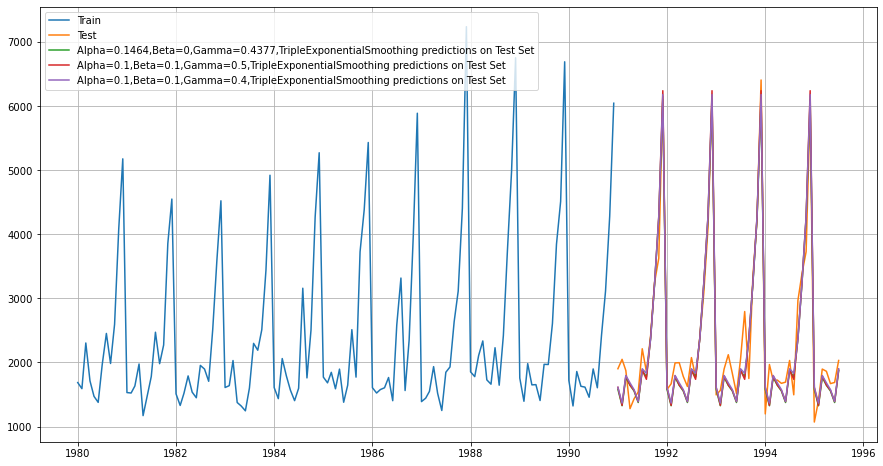

In [776]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

## Plotting the actual training and test data
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

## Triple Exponential Smoothing Automated parameter estimation
#plt.plot(TES_train['auto_predict'], label='Alpha=0.789,Beta=0.105,Gamma=0.210,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing predictions on Test Set')


## Alpha=0.1,Beta=0.1,Gamma=0.5 (model which has the minimum RMSE on the test data)
#plt.plot(TES_train['predict', 0.1, 0.1, 0.5], label='Alpha=0.1,Beta=0.1,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.1, 0.5], label='Alpha=0.1,Beta=0.1,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')

## Alpha=0.1,Beta=0.1,Gamma=0.4 (model which has the minimum MAPE on the test data)
#plt.plot(TES_train['predict', 0.1, 0.1, 0.4], label='Alpha=0.1,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.1, 0.4], label='Alpha=0.1,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [777]:
resultsDf_8_3 = pd.DataFrame({'RMSE': [resultsDf_8_2['Test RMSE'][4],resultsDf_8_2['Test RMSE'][3]],
                              'MAPE':[resultsDf_8_2['Test MAPE'][4],resultsDf_8_2['Test MAPE'][3]]}
                           ,index=['Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing',
                                  'Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,RMSE,MAPE
RegressionOnTime,1389.135175,59.345572
NaiveModel,3864.279352,201.327650
SimpleAverageModel,1275.081804,39.157336
"Alpha=0.0496,SimpleExponentialSmoothing",1316.035487,50.940345
"Alpha=0.2,SimpleExponentialSmoothing",1595.206839,75.835713
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398,58.065993
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",6039.537339,280.335660
"Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing",3611.763322,177.929258
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",322.209983,12.292042
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",324.755631,12.330466


In [778]:
print('Sorted by RMSE values on the Test Data:')
display(resultsDf.sort_values(by=['RMSE']))
print('Sorted by MAPE values on the Test Data:')
display(resultsDf.sort_values(by=['MAPE']))

Sorted by RMSE values on the Test Data:


,RMSE,MAPE
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",313.252468,11.883049
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",322.209983,12.292042
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",324.755631,12.330466
SimpleAverageModel,1275.081804,39.157336
"Alpha=0.0496,SimpleExponentialSmoothing",1316.035487,50.940345
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398,58.065993
RegressionOnTime,1389.135175,59.345572
"Alpha=0.2,SimpleExponentialSmoothing",1595.206839,75.835713
"Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing",3611.763322,177.929258
NaiveModel,3864.279352,201.327650


Sorted by MAPE values on the Test Data:


,RMSE,MAPE
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",313.252468,11.883049
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",322.209983,12.292042
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",324.755631,12.330466
SimpleAverageModel,1275.081804,39.157336
"Alpha=0.0496,SimpleExponentialSmoothing",1316.035487,50.940345
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398,58.065993
RegressionOnTime,1389.135175,59.345572
"Alpha=0.2,SimpleExponentialSmoothing",1595.206839,75.835713
"Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing",3611.763322,177.929258
NaiveModel,3864.279352,201.327650


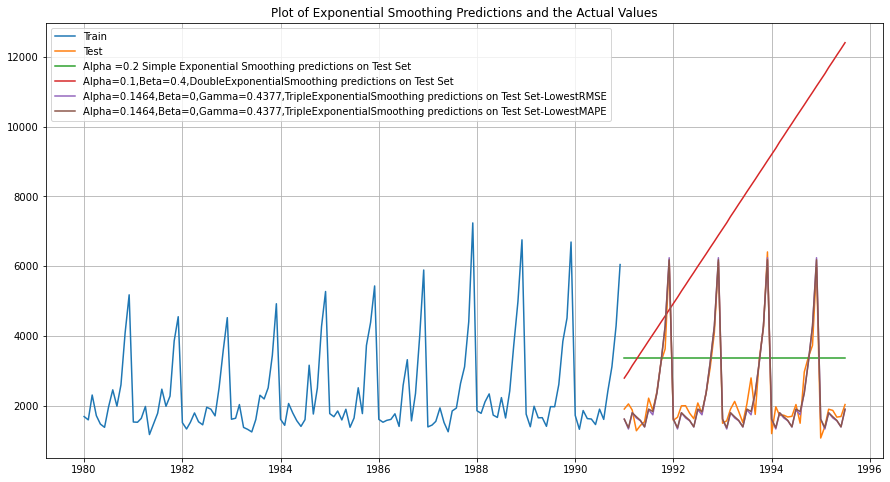

In [779]:
## Plotting on both the Training and Test data

# Plotting the actual training and test values
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

# Plotting the best Simple Exponential Smoothing Model
#plt.plot(SES_train['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')

# Plotting the best Double Exponential Smoothing Model
#plt.plot(DES_train['predict', 0.1, 0.4], label='Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.4], label='Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')

# Plotting the best Triple Exponential Smoothing Model according to the lowest RMSE
#plt.plot(TES_train['predict', 0.1, 0.1, 0.5], label='Alpha=0.1,Beta=0.1,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set-LowestRMSE')
plt.plot(TES_test['predict', 0.1, 0.1, 0.5], label='Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing predictions on Test Set-LowestRMSE')

# Plotting the best Triple Exponential Smoothing Model according to the lowest MAPE
#plt.plot(TES_train['predict', 0.1, 0.1, 0.4], label='Alpha=0.1,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set-LowestMAPE')
plt.plot(TES_test['predict', 0.1, 0.1, 0.4], label='Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing predictions on Test Set-LowestMAPE')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Actual Values');

### Model 1 - Building on the Full Data

In [780]:
final_model_fullmodel1 = ExponentialSmoothing(sparkling['Sparkling'],seasonal='mul',seasonal_periods=12)

fullmodel1=final_model_fullmodel1.fit(smoothing_level=0.7368,smoothing_slope=0.1,smoothing_seasonal=0.2631)

In [781]:
RMSE_fullmodel1 = metrics.mean_squared_error(Sparkling['Sparkling'],fullmodel1.fittedvalues)**0.5
MAPE_fullmodel1 = MAPE(Sparkling['Sparkling'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 485.02478028788545 
MAPE: 16.72996330713816


In [782]:
prediction_1 = fullmodel1.forecast(steps=len(test))

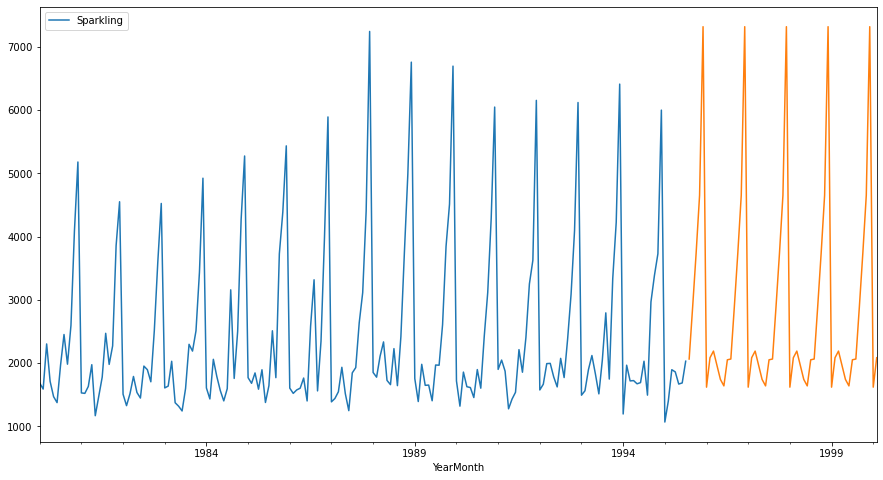

In [783]:
Sparkling.plot()
prediction_1.plot();

In [784]:
1.96*np.std(fullmodel1.resid)

947.2849739131283

In [785]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1115.889253,2065.717279,3015.545304
1995-09-01,1933.981108,2883.809133,3833.637159
1995-10-01,2782.419643,3732.247668,4682.075694
1995-11-01,3701.927561,4651.755586,5601.583612
1995-12-01,6367.385611,7317.213637,8267.041662


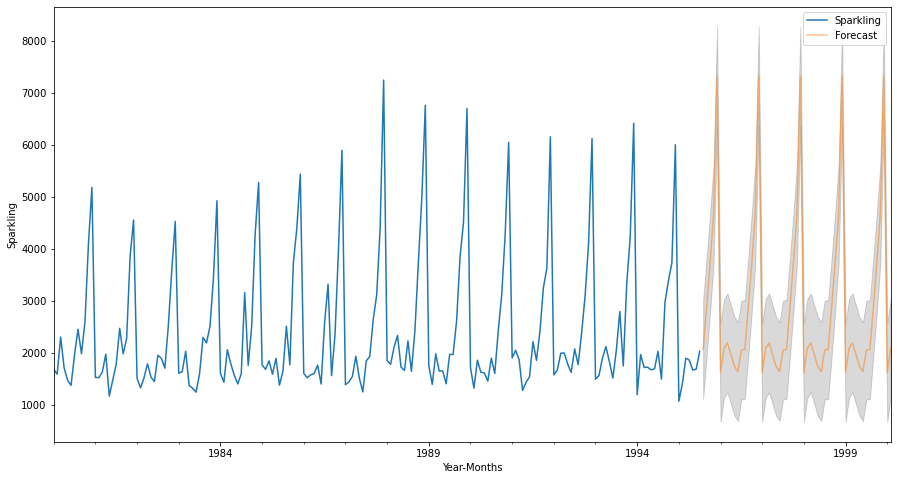

In [786]:

axis = Sparkling.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

## Check for stationarity of the whole Time Series data.

In [787]:
from statsmodels.tsa.stattools import adfuller

In [788]:
dftest = adfuller(train,regression='ct') 
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593686
Number of lags used 12


In [789]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(Sparkling,regression='ct')#running the adf test on the input time series
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    ## creating a series to format the output
    for key,value in dftest[4].items():##running a for loop to format the critical values of the test statistic
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [790]:
adf_test(train)

Results of Dickey-Fuller Test:
Test Statistic                  -1.798262
p-value                          0.705596
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -4.011764
Critical Value (5%)             -3.436029
Critical Value (10%)            -3.142044
dtype: float64


In [791]:

adf_test(train.diff(1).dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -1.798262
p-value                          0.705596
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -4.011764
Critical Value (5%)             -3.436029
Critical Value (10%)            -3.142044
dtype: float64


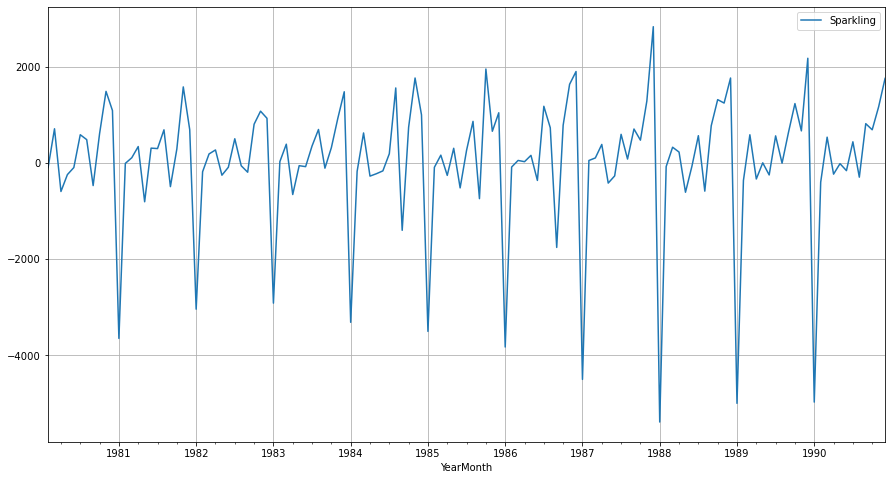

In [792]:
(train.diff(1).dropna()).plot(grid=True);

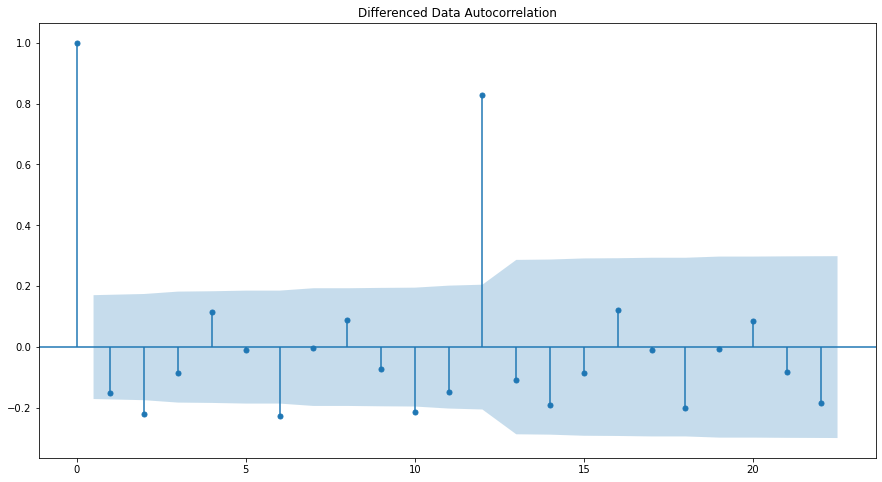

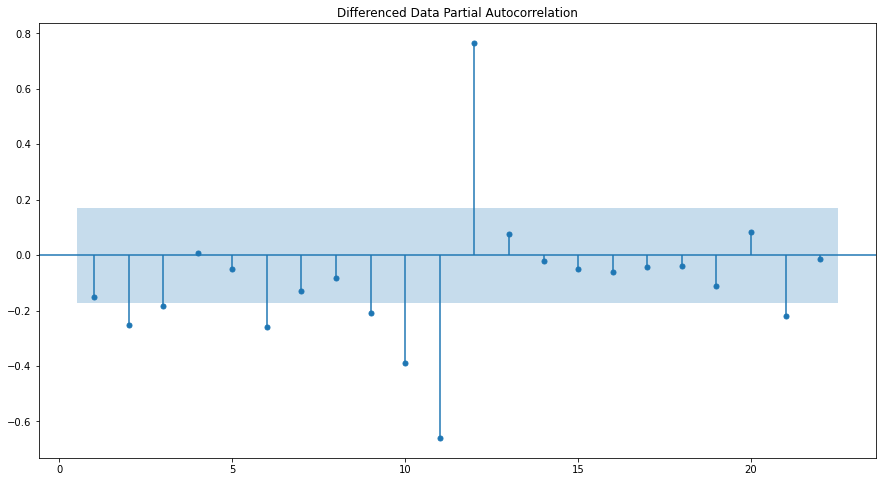

In [793]:
plot_acf(train.diff(1),title='Differenced Data Autocorrelation',missing='drop',alpha=0.05)
plot_pacf(train.diff(1).dropna(),title='Differenced Data Partial Autocorrelation',zero=False,alpha=0.05);

In [794]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [795]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [796]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [797]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [798]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'],order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.527200452466
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922
ARIMA(2, 1, 2) - AIC:2213.509212306332


In [799]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [800]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 20 Oct 2021   AIC                           2213.509
Time:                        21:20:56   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

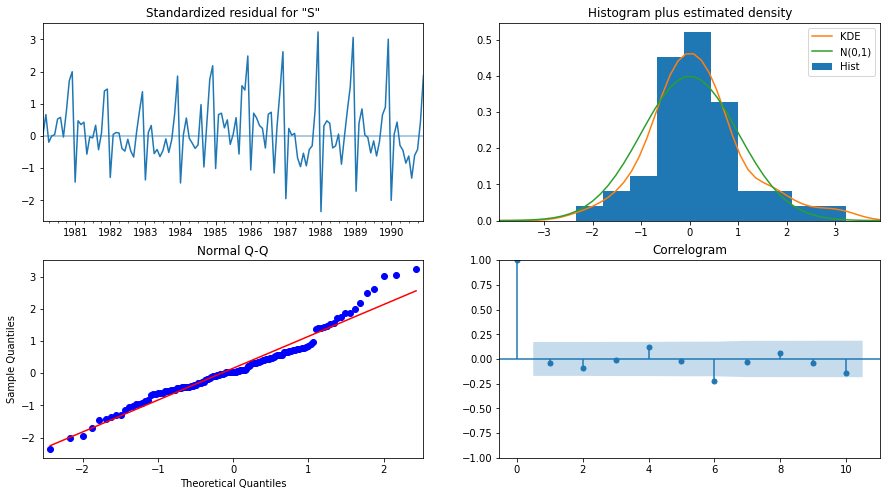

In [801]:
results_auto_ARIMA.plot_diagnostics();

In [802]:
test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [803]:
predicted_auto_ARIMA = results_auto_ARIMA.predict(start=test.index[0],end=test.index[-1])

In [804]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [805]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA)#,squared=False
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1689946.879682612 
MAPE: 47.099932436388684


In [806]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1.689947e+06,47.099932


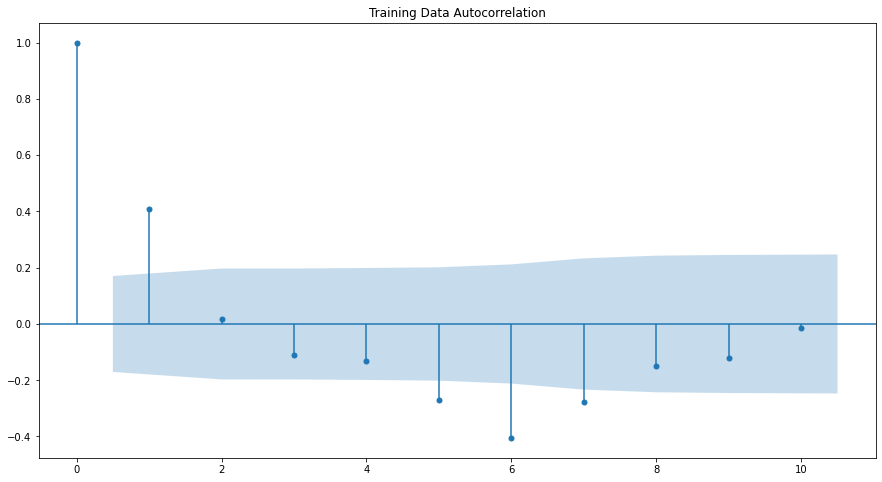

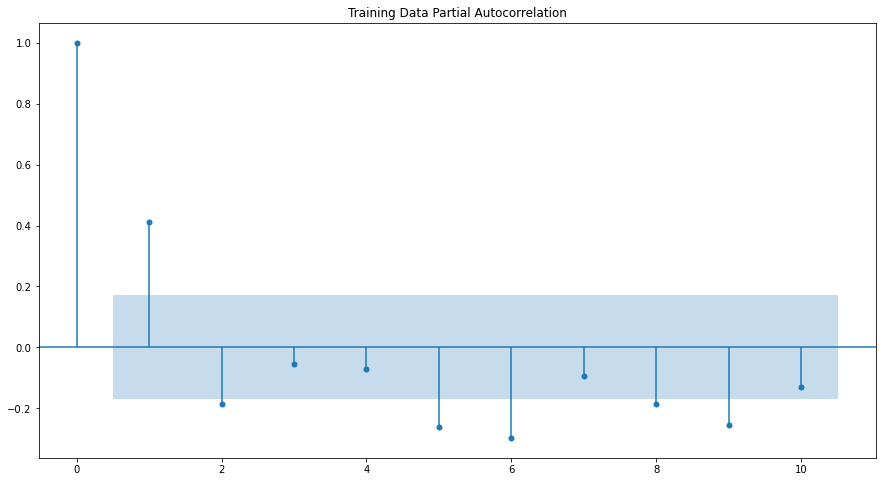

In [807]:
plot_acf(train,lags=10,title='Training Data Autocorrelation')
plot_pacf(train,lags=10,title='Training Data Partial Autocorrelation')
plt.show()

In [808]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Wed, 20 Oct 2021   AIC                           2235.755
Time:                        21:20:59   BIC                           2244.381
Sample:                    01-01-1980   HQIC                          2239.260
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

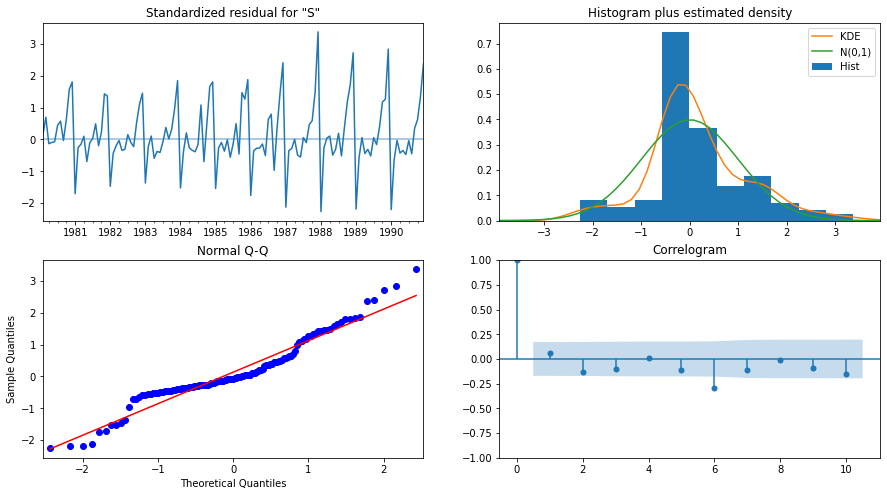

In [809]:
results_manual_ARIMA.plot_diagnostics();

In [810]:
predicted_manual_ARIMA = results_manual_ARIMA.predict(start=test.index[0],end=test.index[-1])

In [811]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1742232.9858055904 
MAPE: 42.091703891301286


In [812]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(1,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1.689947e+06,47.099932
"ARIMA(1,1,2)",1.742233e+06,42.091704


# SARIMA

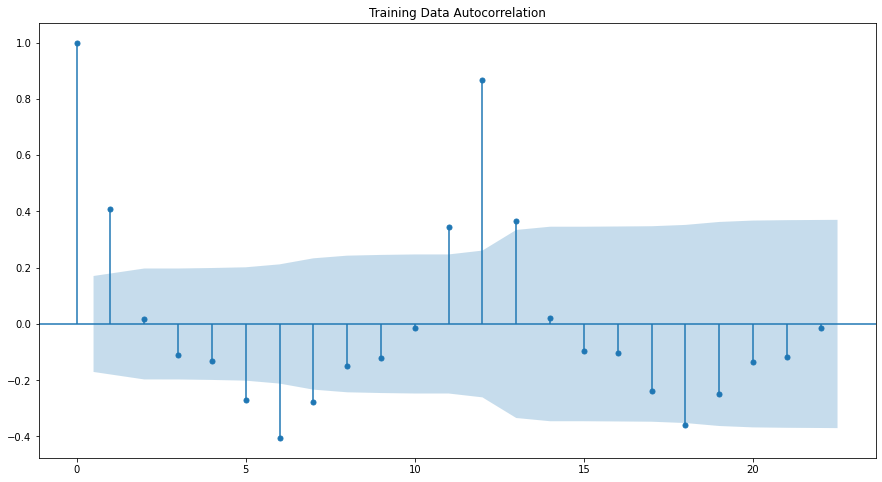

In [813]:
plot_acf(train,title='Training Data Autocorrelation')
plt.show()

In [814]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [815]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [816]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236748
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791871
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610893
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920836
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573264204
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838495
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144030938
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177198
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085400543
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018826079407
SARIMA(0, 1

In [817]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584248
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.076790
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121579
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [818]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -770.038
Date:                            Wed, 20 Oct 2021   AIC                           1556.077
Time:                                    21:22:37   BIC                           1577.232
Sample:                                         0   HQIC                          1564.647
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6381      0.291     -2.190      0.029      -1.209      -0.067
ma.L1         -0.3059      0.189   

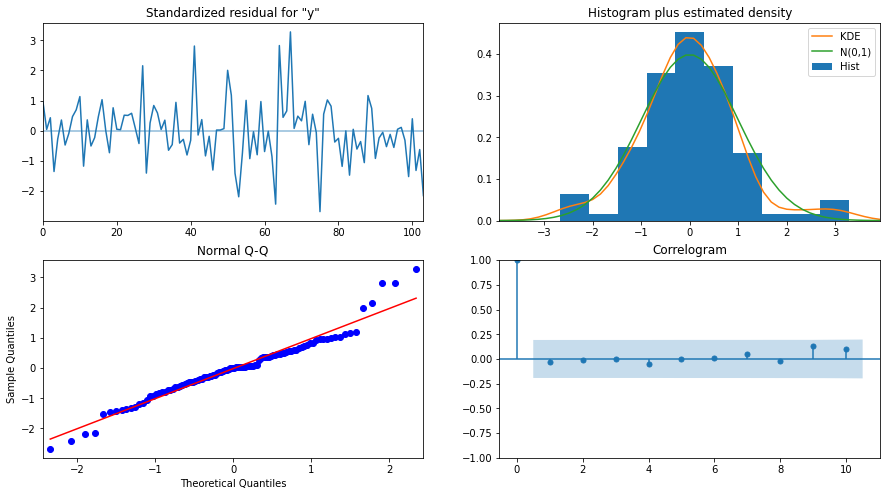

In [819]:
results_auto_SARIMA.plot_diagnostics();

In [820]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [821]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 548.1377262912744 
MAPE: 22.03322328681616


In [822]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1.689947e+06,47.099932
"ARIMA(1,1,2)",1.742233e+06,42.091704
"SARIMA(1,1,2)(2,0,2,12)",5.481377e+02,22.033223


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots

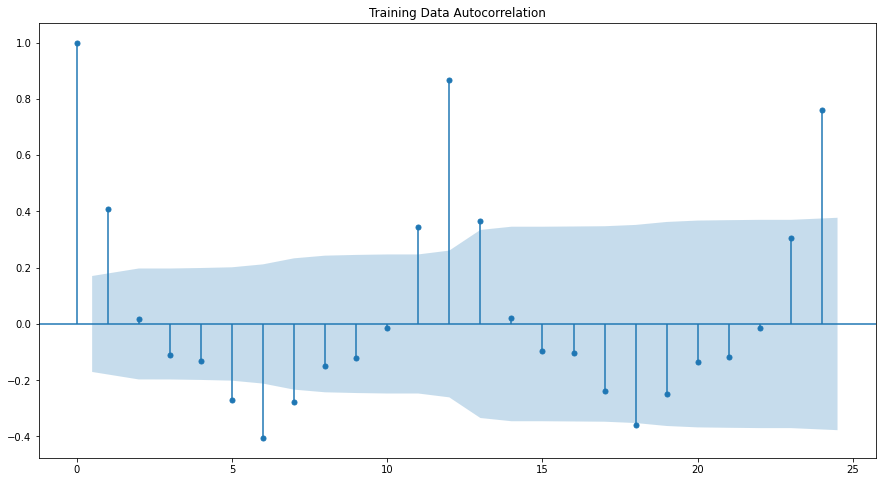

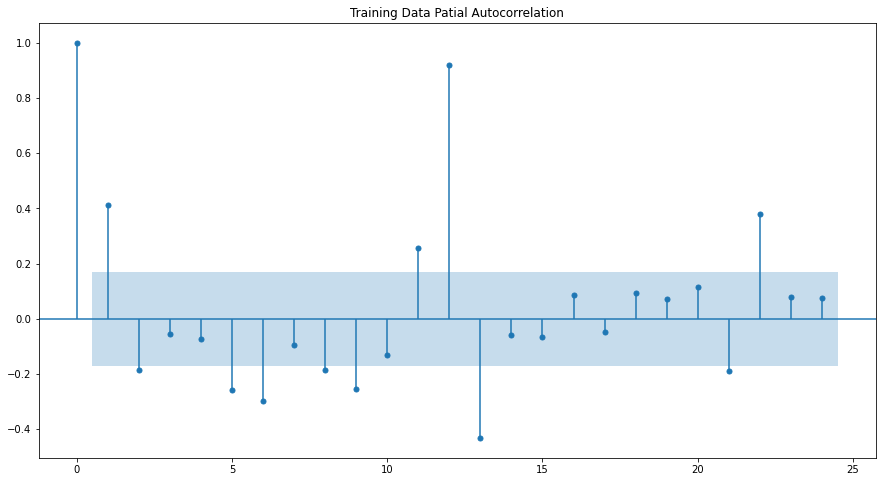

In [823]:
plot_acf(train['Sparkling'],title='Training Data Autocorrelation',lags=24)
plot_pacf(train['Sparkling'],title='Training Data Patial Autocorrelation',lags=24)
plt.show()

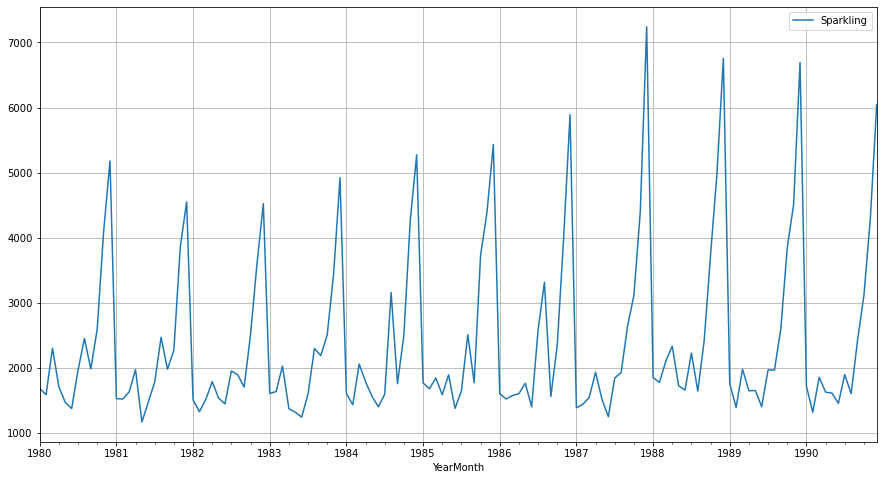

In [824]:
train.plot()
plt.grid();

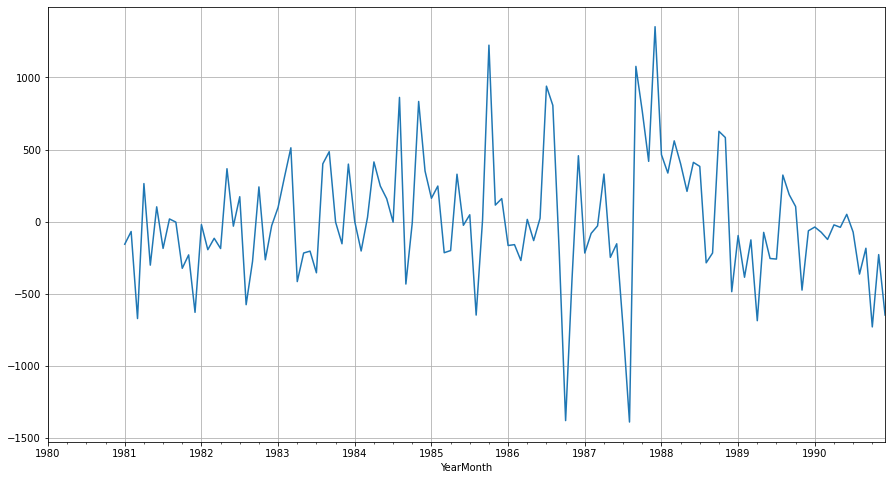

In [825]:
(train['Sparkling'].diff(12)).plot()
plt.grid();

In [826]:
dftest = adfuller(train['Sparkling'].diff(12).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.458
DF test p-value is 6.266010697306863e-12
Number of lags used 0


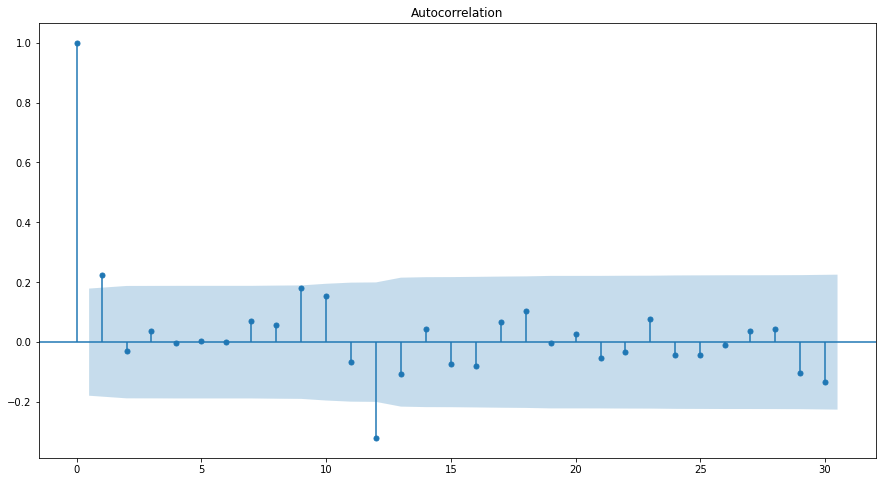

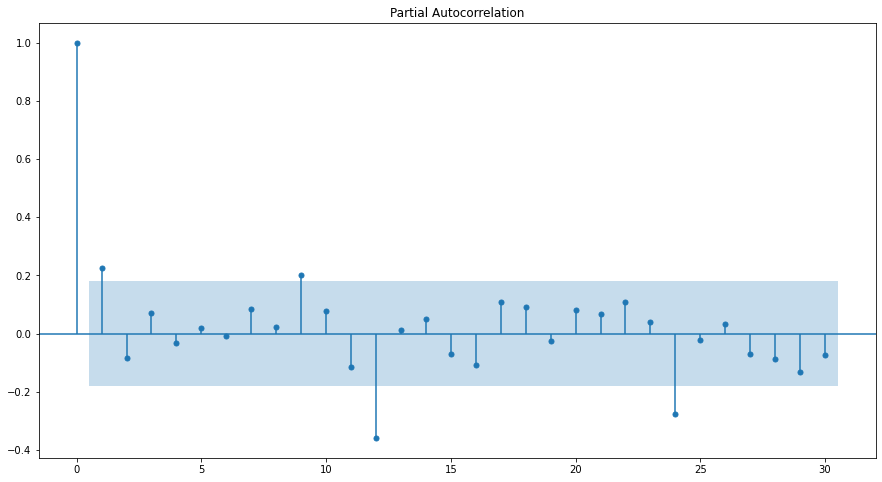

In [827]:
plot_acf(train['Sparkling'].diff(12).dropna(),lags=30)
plot_pacf(train['Sparkling'].diff(12).dropna(),lags=30);

In [828]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 0, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -778.772
Date:                              Wed, 20 Oct 2021   AIC                           1569.544
Time:                                      21:22:44   BIC                           1585.467
Sample:                                           0   HQIC                          1575.996
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6093      0.489     -1.245      0.213      -1.568       0.350
ma.L1          0.85

## Predict on the Test Set using this model and evaluate the model.

In [829]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [830]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 319.51922716503066 
MAPE: 11.089567731663776


In [834]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(1,0,1)(1,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf,resultsDf_8_3])
resultsDf


,RMSE,MAPE
"ARIMA(2,1,2)",1.689947e+06,47.099932
"ARIMA(1,1,2)",1.742233e+06,42.091704
"SARIMA(1,1,2)(2,0,2,12)",5.481377e+02,22.033223
"SARIMA(1,0,1)(1,1,1,12)",3.195192e+02,11.089568
"SARIMA(1,0,1)(1,1,1,12)",3.195192e+02,11.089568
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",3.247556e+02,12.330466
"Alpha=0.1464,Beta=0,Gamma=0.4377,TripleExponentialSmoothing",3.132525e+02,11.883049


In [831]:
resultsDf.sort_values(by=['RMSE'])

,RMSE,MAPE
"SARIMA(1,1,2)(2,0,2,12)",5.481377e+02,22.033223
"ARIMA(2,1,2)",1.689947e+06,47.099932
"ARIMA(1,1,2)",1.742233e+06,42.091704


In [840]:
y_hat_avg = test.copy()
opt_model = ExponentialSmoothing(TES_train['Sparkling'],seasonal='mul',seasonal_periods=12 ).fit()
print(opt_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Sparkling   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                       16737214.706
Optimized:                         True   AIC                           1579.045
Trend:                             None   BIC                           1619.405
Seasonal:                Multiplicative   AICC                          1583.776
Seasonal Periods:                    12   Date:                 Wed, 20 Oct 2021
Box-Cox:                          False   Time:                         21:34:27
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1464414                alpha                 True
smoothing_seasonal       

In [841]:
opt_mod_y_hat = pd.DataFrame(opt_model.forecast(12))

In [842]:
date = pd.date_range(start='08/01/1995', end='8/1/1996', freq='M')
# len(date)
opt_mod_y_hat.index  = date 

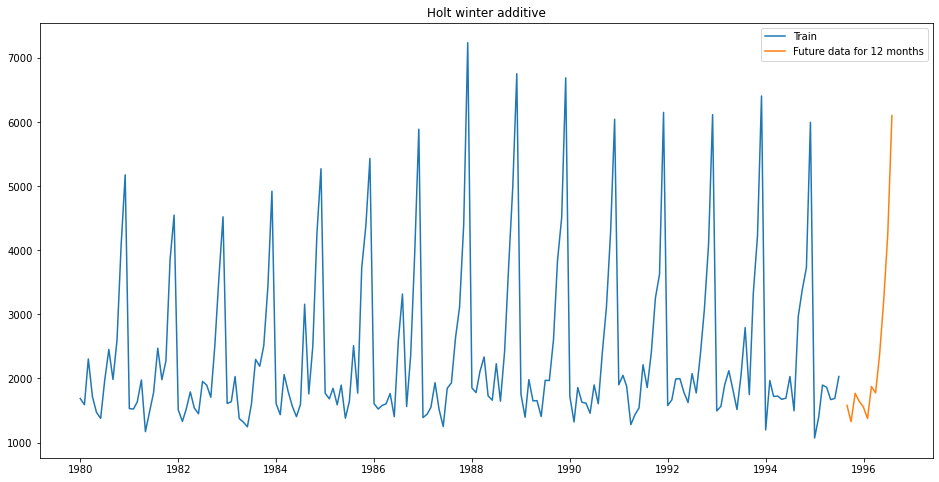

In [844]:
plt.figure(figsize=(16,8))
plt.plot( Sparkling['Sparkling'], label='Train')
# plt.plot(test['Sparkling'], label='Test')
plt.plot(opt_mod_y_hat, label='Future data for 12 months')
plt.title('Holt winter additive' )
plt.legend(loc='best')